<a href="https://colab.research.google.com/github/fadi-theodory/Prediction-of-Product-Sales/blob/main/Project_1_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
fpath="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(fpath)


In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Data Cleaning**

1) How many rows and columns?

` there are 8523 rows and 12 columns`

2) What are the datatypes of each variable?

` we have numbers (float and int) and objects`


In [42]:
df.duplicated().sum()



np.int64(0)

3) Are there duplicates? If so, drop any duplicates.

`no duplicates`


In [43]:
null_sums=df.isna().sum()
null_sums

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


<Axes: >

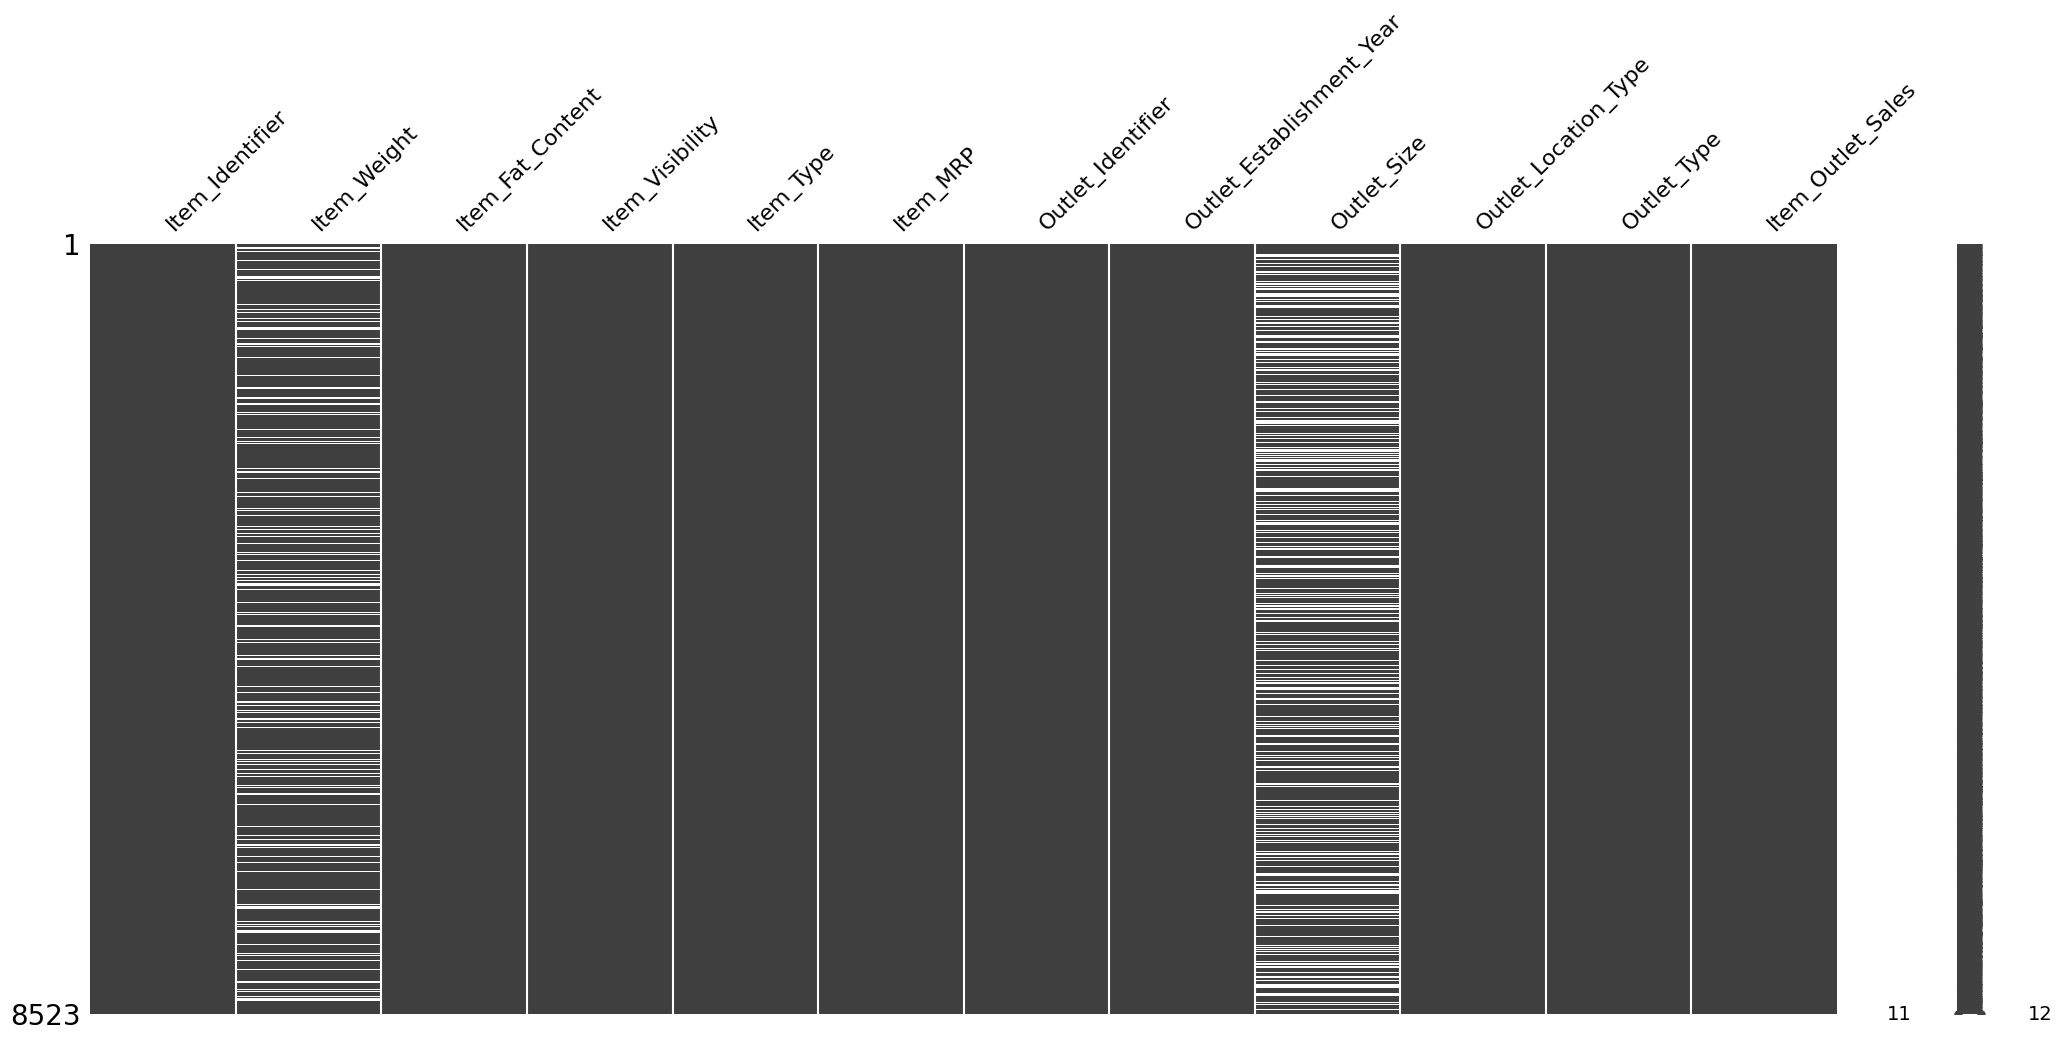

In [44]:
import missingno as msno
msno.matrix(df)

4) Identify missing values.

` the outlet size and the item weight`

In [45]:
df.dtypes =="object"

,0
Item_Identifier,True
Item_Weight,False
Item_Fat_Content,True
Item_Visibility,False
Item_Type,True
Item_MRP,False
Outlet_Identifier,True
Outlet_Establishment_Year,False
Outlet_Size,True
Outlet_Location_Type,True


In [46]:
#for the item weight, we will replace the missing values with the mean
# we will check the mean first
# we will get the mean of each item type
item_weight_mean = df.groupby("Item_Type")["Item_Weight"].mean()
item_weight_mean

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [47]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

df["Item_Weight"].value_counts()

,count
Item_Weight,
13.224769,213
12.987880,212
13.384736,151
12.867061,138
13.426069,116
...,...
6.895000,2
9.420000,1
7.685000,1


<Axes: >

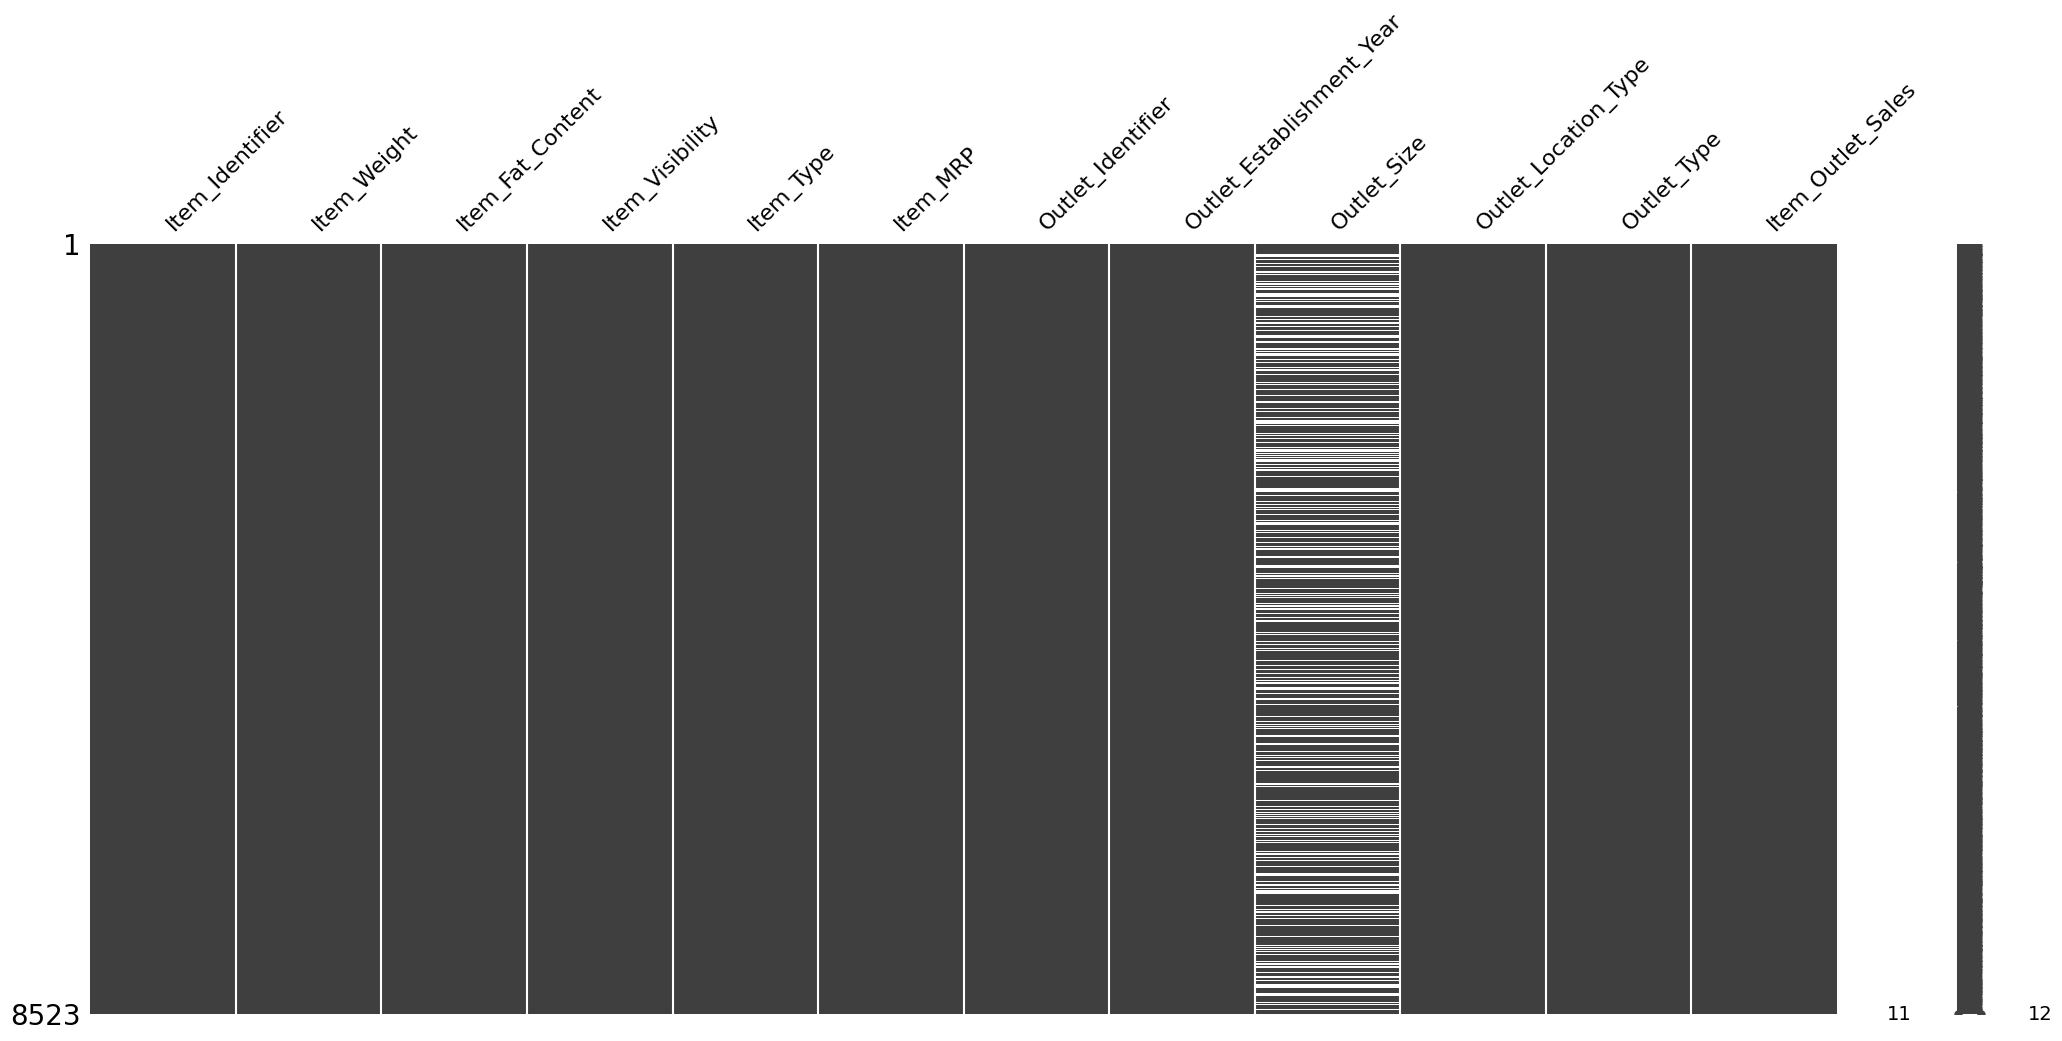

In [48]:
msno.matrix(df)

In [49]:
df["Item_Weight"].isna().sum()

np.int64(0)

In [50]:
#outlet size is a string, so we will change the null to missing
df["Outlet_Size"]=df["Outlet_Size"].fillna("Missing")
df["Outlet_Size"].value_counts()

,count
Outlet_Size,
Medium,2793
Missing,2410
Small,2388
High,932


In [51]:
# to check if there are any other null items
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


<Axes: >

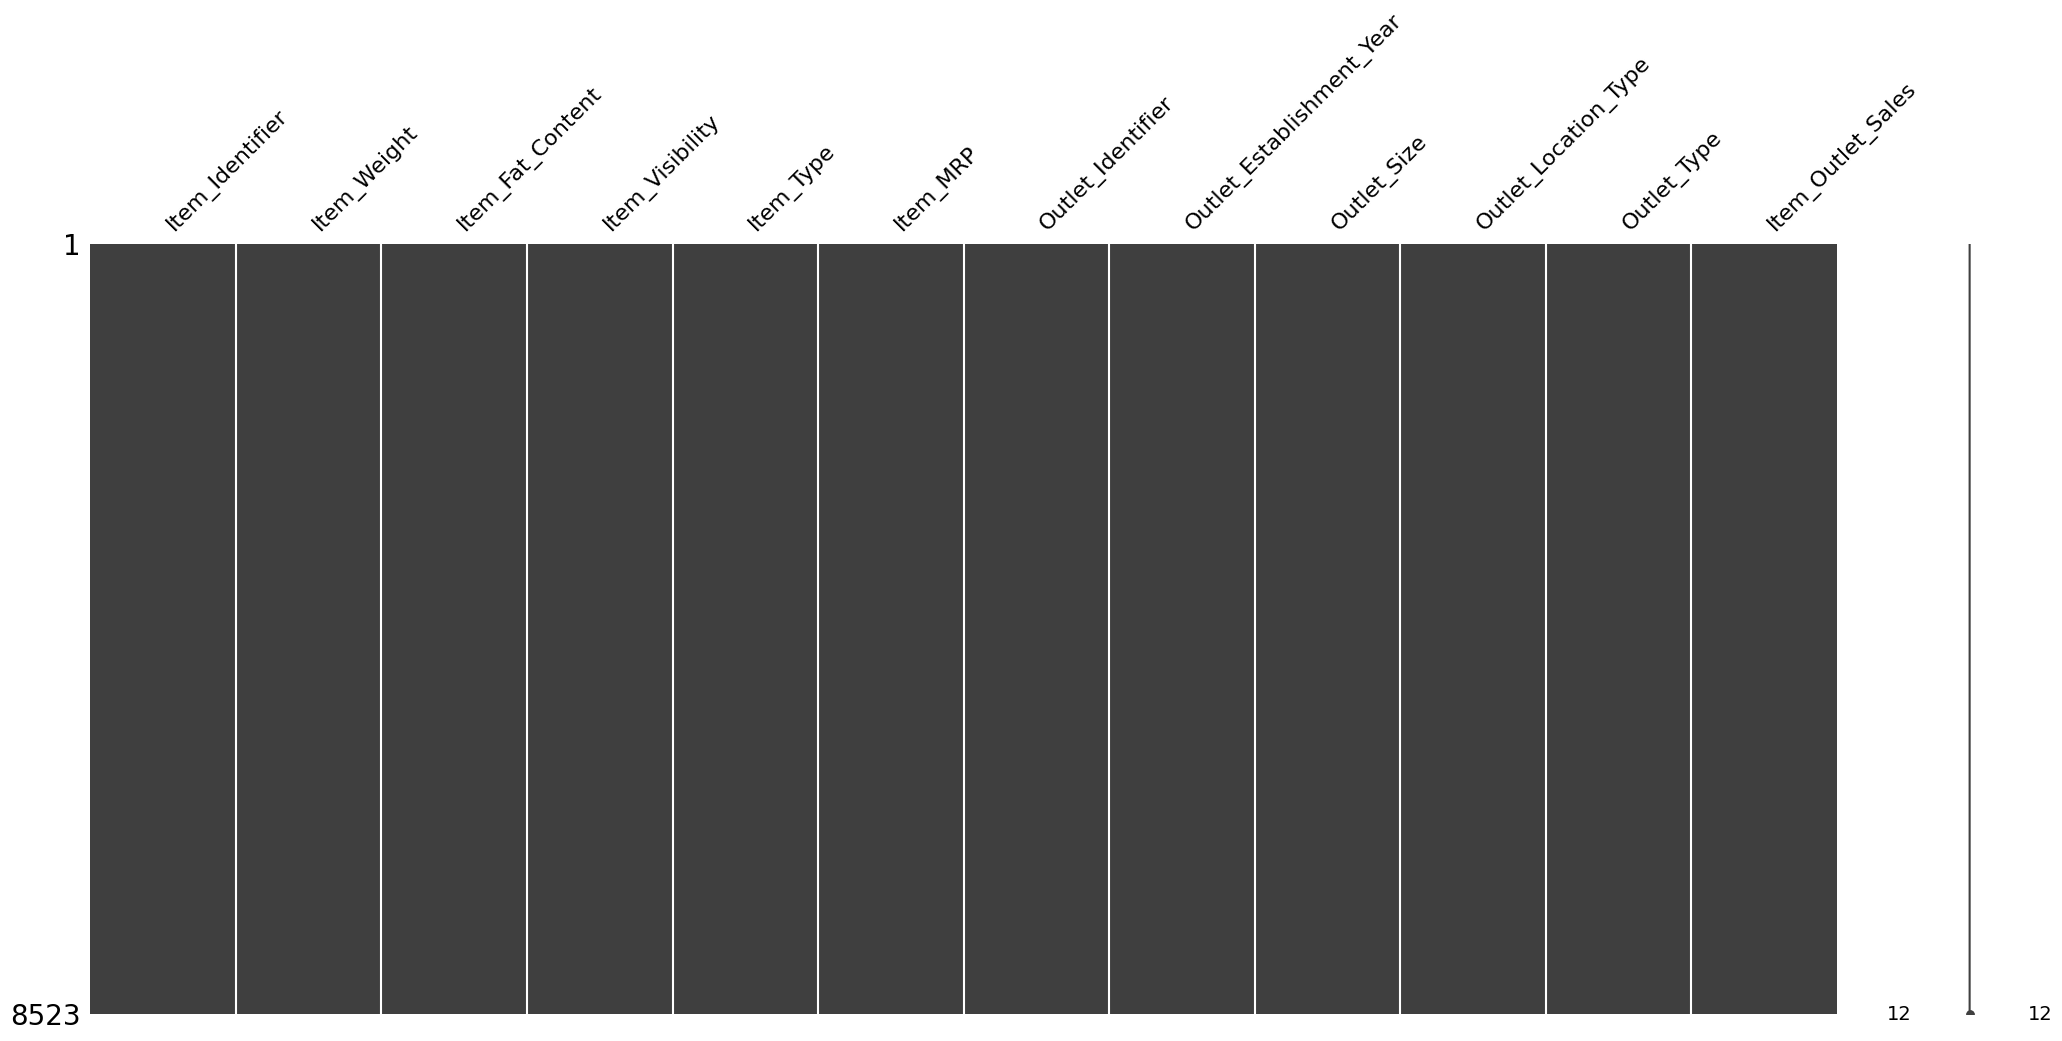

In [52]:
msno.matrix(df)

In [53]:
# to fix the data, we will first check the value counts for all columns, so we will use for
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print ("\n")

Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Weight
Item_Weight
13.224769    213
12.987880    212
13.384736    151
12.867061    138
13.426069    116
            ... 
6.895000       2
9.420000       1
7.685000       1
6.520000       1
5.400000       1
Name: count, Length: 431, dtype: int64


Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Visibility
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy     

In [54]:
# we found that Item fat content is not consistent
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [55]:
# we need to change low fat and LF to Low Fat and reg to Regular
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("reg","Regular")
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [56]:
num_cols=df.select_dtypes(include="number")
num_cols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [57]:
for x in num_cols:
  print(x)
  print(num_cols[x].describe())
  print("\n")

Item_Weight
count    8523.000000
mean       12.857890
std         4.232804
min         4.555000
25%         9.310000
50%        12.867061
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Item_Outlet_Sales
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

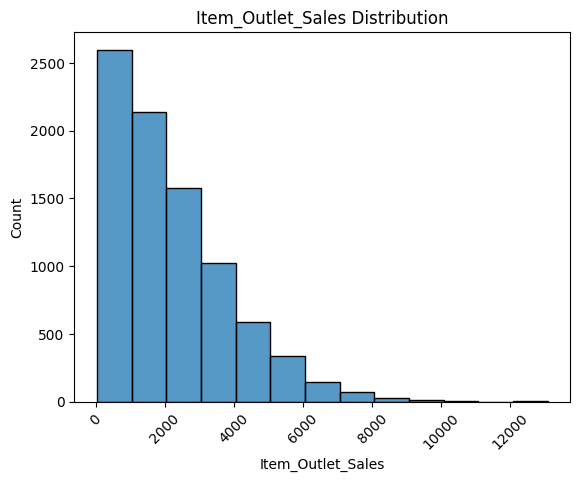

In [78]:

ax = sns.histplot(data=df, x='Item_Outlet_Sales',binwidth=1000)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Item_Outlet_Sales Distribution')




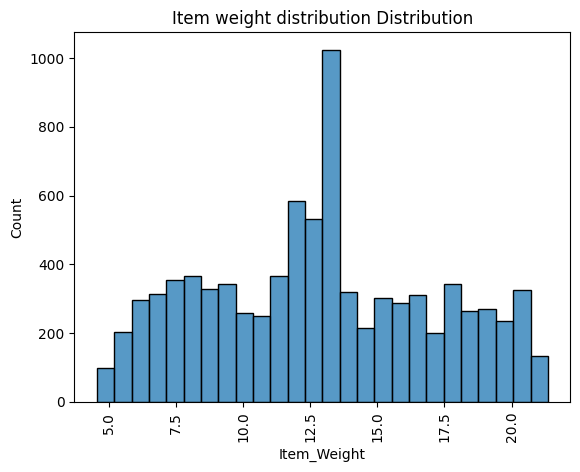

In [85]:

ax = sns.histplot(data=df, x='Item_Weight')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Item weight distribution Distribution');

# Boxplots

this shows the distribution of sales amounts, we can see the median is less than 2000 by a little.
ina ddiotn there are some outliers

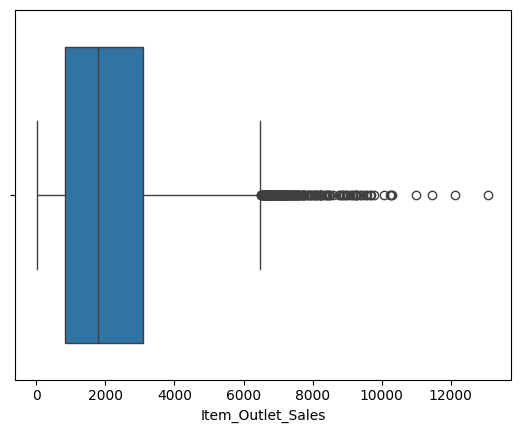

In [86]:
ax = sns.boxplot(data=df, x="Item_Outlet_Sales")

Box plot to see where do we stand in the visiblity of products

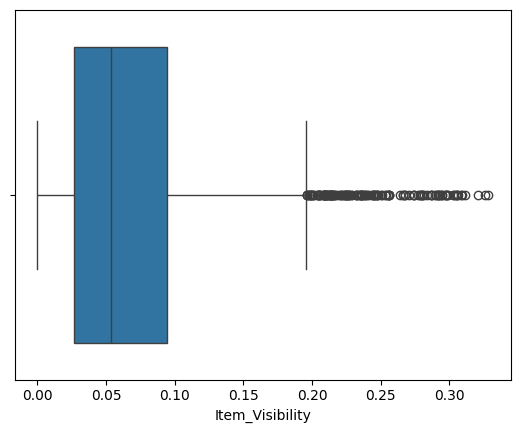

In [91]:
ax = sns.boxplot(data=df, x="Item_Visibility")

most of the items' visibility is low

# The following is to check the MRP(Maximum Retail Price (list price) of the product)

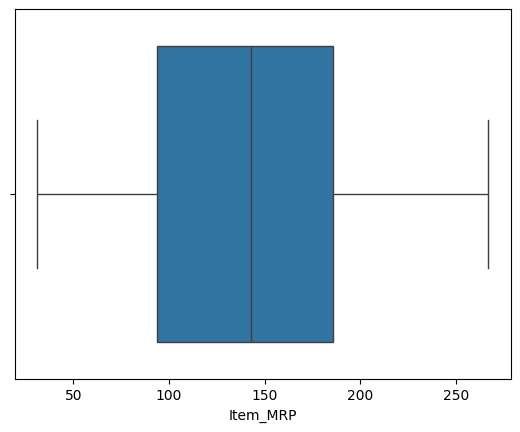

In [92]:
ax = sns.boxplot(data=df, x="Item_MRP")

`we can see that most of the items' max amount is in the middle `

# Heatmap to view the correlation between features.


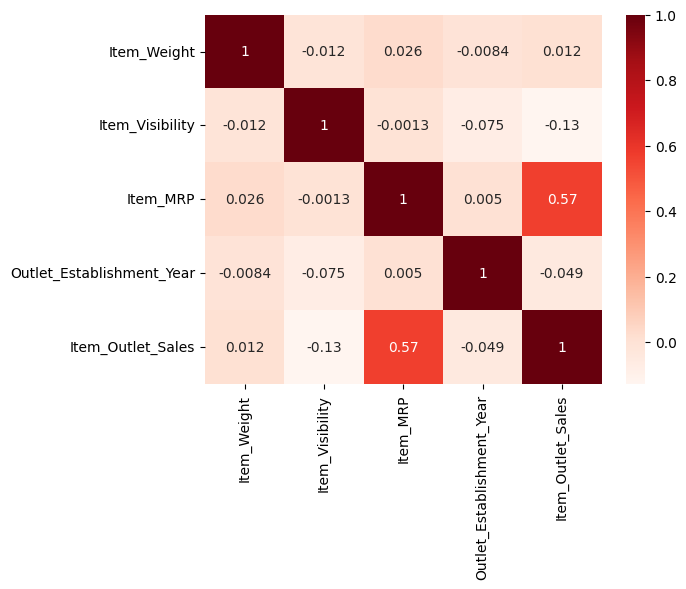

In [95]:
# Create a fig, ax with a figsize argument
corr = df.corr(numeric_only = True)
corr.round(2)

fig, ax = plt.subplots()
sns.heatmap(corr, cmap = 'Reds', annot = True, ax=ax);


` the strongest correlation as we can see is between ITM MRP and Item outlet sales `
` we can see that there is a correlation, a weak one -.13 between visibility and sales `

# Countplots to view the frequency of each class of categorial features in your dataset.


In [96]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


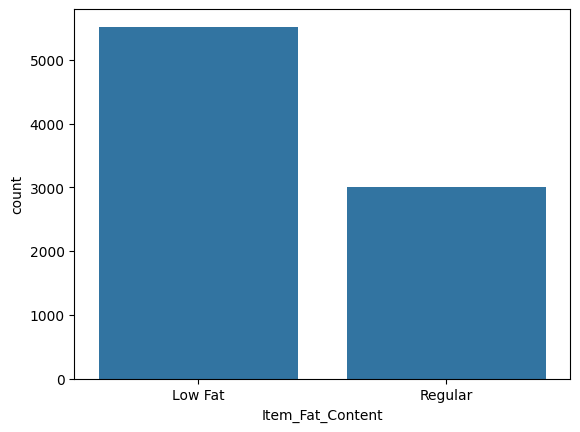

In [119]:
ax = sns.countplot(data=df, x="Item_Fat_Content");

` we can see that the count of sales for low fat is higher than regular `

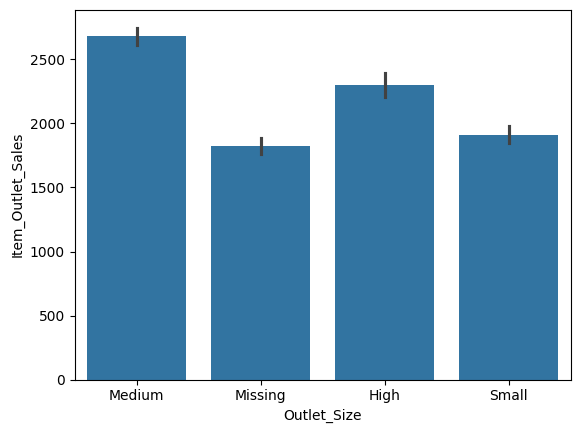

In [101]:
ax = sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

` we note that the medium outlet has the highest sales `

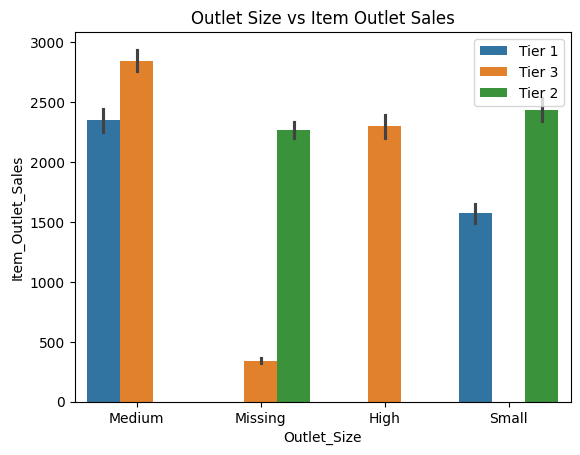

In [108]:
ax = sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue = "Outlet_Location_Type")
ax.set_title("Outlet Size vs Item Outlet Sales divided by location type")
ax.legend(loc=1);

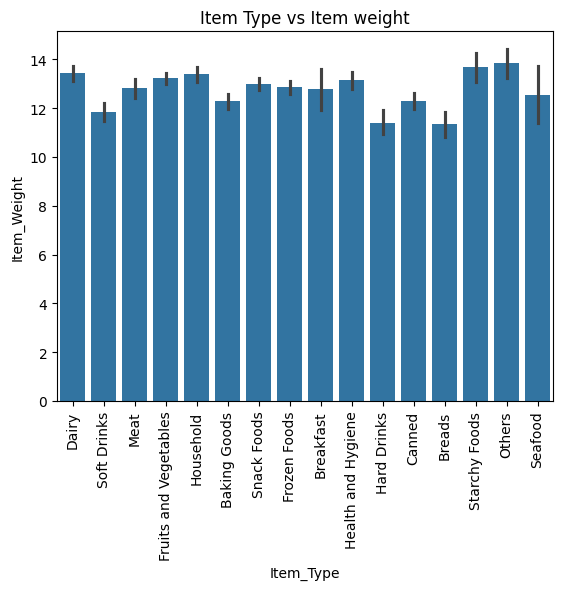

In [129]:
ax = sns.barplot(data=df, x='Item_Type', y='Item_Weight')
ax.set_title("Item Type vs Item weight")
ax.tick_params(axis='x', rotation = 90);
